In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

In [2]:
DATA_PATH = "../data/"

In [3]:
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 1. Importamos os dados

In [4]:
cols = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income-per-year"
]

In [5]:
df_train = pd.read_csv(os.path.join(DATA_PATH, "adult.data"), names=cols)
df_test = pd.read_csv(os.path.join(DATA_PATH, "adult.test"), names=cols, skiprows=1)

In [6]:
df_train.shape, df_test.shape # Bate com o valor fornecido nos metadados

((32561, 15), (16281, 15))

In [7]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


## 2. Análise Exploratória

_2) Analyze features, missing data, and overall characteristics of the dataset (using tools in sklearn). Select features, discretize numerical features, handle missing data._

### 2.1 Counts

In [9]:
sorted(df_train.columns)

['age',
 'capital-gain',
 'capital-loss',
 'education',
 'education-num',
 'fnlwgt',
 'hours-per-week',
 'income-per-year',
 'marital-status',
 'native-country',
 'occupation',
 'race',
 'relationship',
 'sex',
 'workclass']

In [10]:
sorted(df_train.columns) == sorted(df_test.columns)

True

In [11]:
df_train.describe() # para features numéricas

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000,32561.000,32561.000,32561.000,32561.000,32561.000
mean,38.582,189778.367,10.081,1077.649,87.304,40.437
std,13.640,105549.978,2.573,7385.292,402.960,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,237051.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


In [12]:
df_test.describe() # para features numéricas

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,16281.000,16281.000,16281.000,16281.000,16281.000,16281.000
mean,38.767,189435.678,10.073,1081.905,87.899,40.392
std,13.849,105714.908,2.568,7583.936,403.105,12.479
min,17.000,13492.000,1.000,0.000,0.000,1.000
25%,28.000,116736.000,9.000,0.000,0.000,40.000
50%,37.000,177831.000,10.000,0.000,0.000,40.000
75%,48.000,238384.000,12.000,0.000,0.000,45.000
max,90.000,1490400.000,16.000,99999.000,3770.000,99.000


In [13]:
df_train.select_dtypes(include='object').describe() # para features categóricas

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income-per-year
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [14]:
df_test.select_dtypes(include='object').describe() # para features categóricas

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income-per-year
count,16281,16281,16281,16281,16281,16281,16281,16281,16281
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K.
freq,11210,5283,7403,2032,6523,13946,10860,14662,12435


Vamos verificar cada uma das features categóricas.

In [15]:
df_train["workclass"].value_counts(dropna=False), df_test["workclass"].value_counts(dropna=False) 

( Private             22696
  Self-emp-not-inc     2541
  Local-gov            2093
  ?                    1836
  State-gov            1298
  Self-emp-inc         1116
  Federal-gov           960
  Without-pay            14
  Never-worked            7
 Name: workclass, dtype: int64,
  Private             11210
  Self-emp-not-inc     1321
  Local-gov            1043
  ?                     963
  State-gov             683
  Self-emp-inc          579
  Federal-gov           472
  Without-pay             7
  Never-worked            3
 Name: workclass, dtype: int64)

In [16]:
df_train["education"].value_counts(dropna=False), df_test["education"].value_counts(dropna=False)

( HS-grad         10501
  Some-college     7291
  Bachelors        5355
  Masters          1723
  Assoc-voc        1382
  11th             1175
  Assoc-acdm       1067
  10th              933
  7th-8th           646
  Prof-school       576
  9th               514
  12th              433
  Doctorate         413
  5th-6th           333
  1st-4th           168
  Preschool          51
 Name: education, dtype: int64,
  HS-grad         5283
  Some-college    3587
  Bachelors       2670
  Masters          934
  Assoc-voc        679
  11th             637
  Assoc-acdm       534
  10th             456
  7th-8th          309
  Prof-school      258
  9th              242
  12th             224
  Doctorate        181
  5th-6th          176
  1st-4th           79
  Preschool         32
 Name: education, dtype: int64)

In [17]:
df_train["marital-status"].value_counts(dropna=False), df_test["marital-status"].value_counts(dropna=False)

( Married-civ-spouse       14976
  Never-married            10683
  Divorced                  4443
  Separated                 1025
  Widowed                    993
  Married-spouse-absent      418
  Married-AF-spouse           23
 Name: marital-status, dtype: int64,
  Married-civ-spouse       7403
  Never-married            5434
  Divorced                 2190
  Widowed                   525
  Separated                 505
  Married-spouse-absent     210
  Married-AF-spouse          14
 Name: marital-status, dtype: int64)

In [18]:
df_train["occupation"].value_counts(dropna=False), df_test["occupation"].value_counts(dropna=False)

( Prof-specialty       4140
  Craft-repair         4099
  Exec-managerial      4066
  Adm-clerical         3770
  Sales                3650
  Other-service        3295
  Machine-op-inspct    2002
  ?                    1843
  Transport-moving     1597
  Handlers-cleaners    1370
  Farming-fishing       994
  Tech-support          928
  Protective-serv       649
  Priv-house-serv       149
  Armed-Forces            9
 Name: occupation, dtype: int64,
  Prof-specialty       2032
  Exec-managerial      2020
  Craft-repair         2013
  Sales                1854
  Adm-clerical         1841
  Other-service        1628
  Machine-op-inspct    1020
  ?                     966
  Transport-moving      758
  Handlers-cleaners     702
  Tech-support          518
  Farming-fishing       496
  Protective-serv       334
  Priv-house-serv        93
  Armed-Forces            6
 Name: occupation, dtype: int64)

In [19]:
df_train["relationship"].value_counts(dropna=False), df_train["relationship"].value_counts(dropna=False)

( Husband           13193
  Not-in-family      8305
  Own-child          5068
  Unmarried          3446
  Wife               1568
  Other-relative      981
 Name: relationship, dtype: int64,
  Husband           13193
  Not-in-family      8305
  Own-child          5068
  Unmarried          3446
  Wife               1568
  Other-relative      981
 Name: relationship, dtype: int64)

In [20]:
df_train["sex"].value_counts(dropna=False), df_test["sex"].value_counts(dropna=False)

( Male      21790
  Female    10771
 Name: sex, dtype: int64,
  Male      10860
  Female     5421
 Name: sex, dtype: int64)

In [21]:
df_train["native-country"].value_counts(dropna=False), df_test["native-country"].value_counts(dropna=False)

( United-States                 29170
  Mexico                          643
  ?                               583
  Philippines                     198
  Germany                         137
  Canada                          121
  Puerto-Rico                     114
  El-Salvador                     106
  India                           100
  Cuba                             95
  England                          90
  Jamaica                          81
  South                            80
  China                            75
  Italy                            73
  Dominican-Republic               70
  Vietnam                          67
  Guatemala                        64
  Japan                            62
  Poland                           60
  Columbia                         59
  Taiwan                           51
  Haiti                            44
  Iran                             43
  Portugal                         37
  Nicaragua                        34
  Peru      

In [22]:
df_train["income-per-year"].value_counts(dropna=False), df_test["income-per-year"].value_counts(dropna=False)

( <=50K    24720
  >50K      7841
 Name: income-per-year, dtype: int64,
  <=50K.    12435
  >50K.      3846
 Name: income-per-year, dtype: int64)

Vamos remover o "." da target do teste

In [23]:
print(df_test["income-per-year"].head(2))
df_test["income-per-year"] = df_test["income-per-year"].apply(lambda x : x[:-1])
print(df_test["income-per-year"].head(2))

0     <=50K.
1     <=50K.
Name: income-per-year, dtype: object
0     <=50K
1     <=50K
Name: income-per-year, dtype: object


In [24]:
len(df_train[df_train["income-per-year"] == " >50K"]) / len(df_train)

0.2408095574460244

In [25]:
len(df_test[df_test["income-per-year"] == " >50K"]) / len(df_test)

0.23622627602727106

Conclusão:
* A distribuição das variáveis contínuas em ambos os datasets são bastante próximas. Podemos ver que os valores dos quartis são muito próximos para todas as variáveis contínuas em ambos os datasets de treino e de teste;
* Dado que `df_train` tem o dobro de exemplos de `df_test`, a distribuição das variáveis categóricas está aproximadamente igual nos dois datasets;
* Em relação à target, notamos que tem um certo desbalanceamento em relação à classe positiva (24% dos exemplos são positivos).

### 2.2 Nulos

Vou aplicar remoção de espaços em cada campo categórico

In [26]:
for col in df_train.select_dtypes(include='object').columns:
    print(col)
    df_train[col] = df_train[col].str.strip()
    df_test[col] = df_test[col].str.strip()

workclass
education
marital-status
occupation
relationship
race
sex
native-country
income-per-year


Vamos ver a distribuição de nulos. Como os nulos foram representados por "?", vamos fazer um replace e verificar quantos nulos temos

In [27]:
df_train = df_train.replace('?', np.nan)
df_test = df_test.replace('?', np.nan)

<AxesSubplot:>

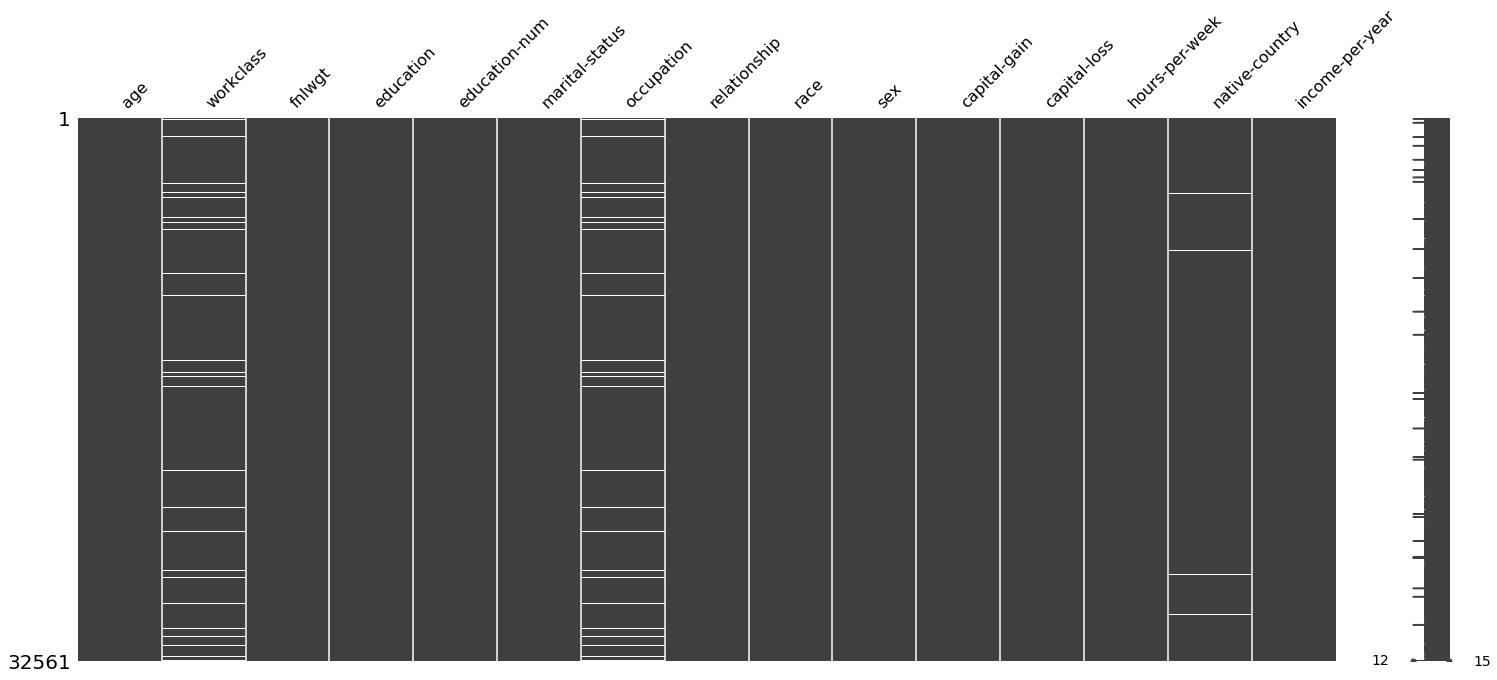

In [28]:
msno.matrix(df_train)

<AxesSubplot:>

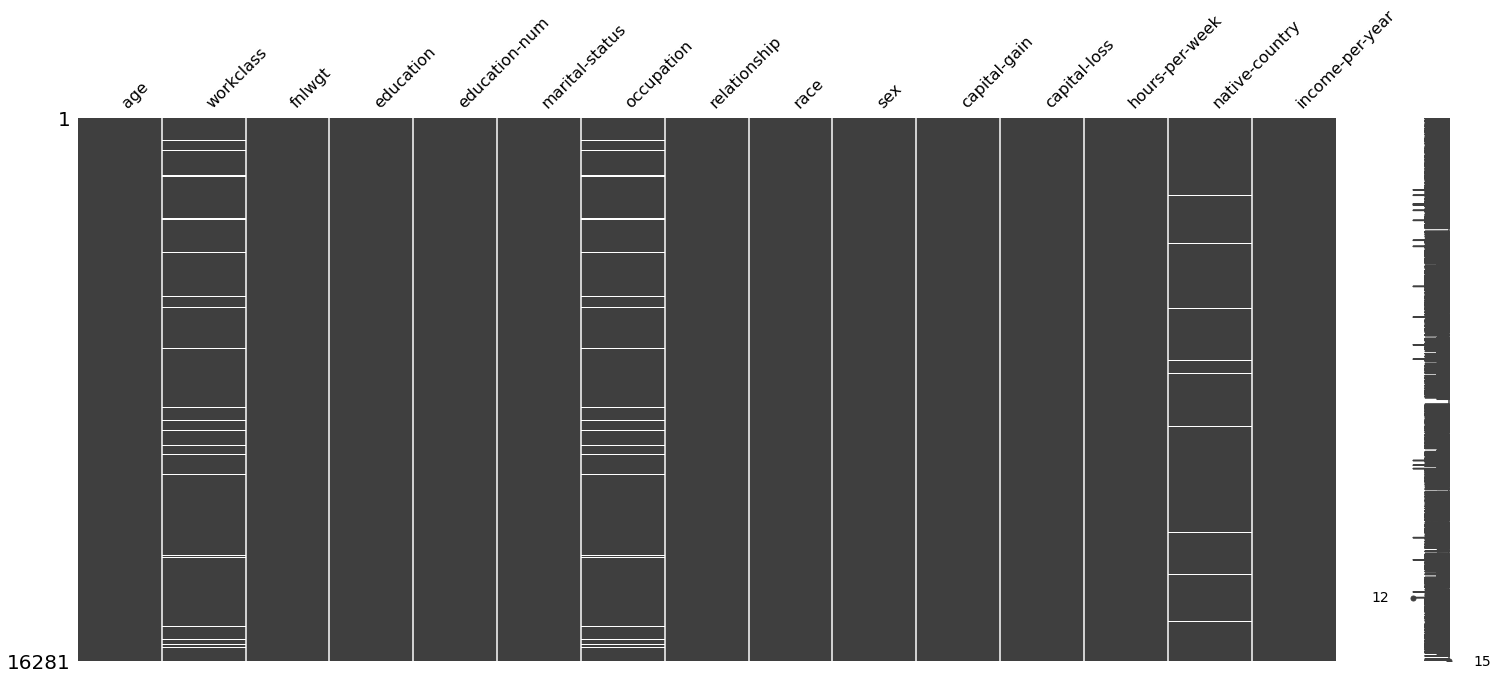

In [29]:
msno.matrix(df_test)

In [30]:
(df_train.isna().sum() / len(df_train)).sort_values(ascending=False)

occupation        0.057
workclass         0.056
native-country    0.018
age               0.000
fnlwgt            0.000
education         0.000
education-num     0.000
marital-status    0.000
relationship      0.000
race              0.000
sex               0.000
capital-gain      0.000
capital-loss      0.000
hours-per-week    0.000
income-per-year   0.000
dtype: float64

In [31]:
(df_test.isna().sum() / len(df_test)).sort_values(ascending=False)

occupation        0.059
workclass         0.059
native-country    0.017
age               0.000
fnlwgt            0.000
education         0.000
education-num     0.000
marital-status    0.000
relationship      0.000
race              0.000
sex               0.000
capital-gain      0.000
capital-loss      0.000
hours-per-week    0.000
income-per-year   0.000
dtype: float64

Conclusão:
* Temos poucos nulos, no máximo 5,9% para dados de Ocupação;
* Ao invés de imputar os valores, podemos remover essas linhas do dataset.

In [32]:
df_train[df_train["occupation"].isna()].shape, df_train.shape

((1843, 15), (32561, 15))

In [33]:
df_test[df_test["occupation"].isna()].shape, df_test.shape

((966, 15), (16281, 15))

In [34]:
df_train[df_train["occupation"].isna()].head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K


In [35]:
df_test[df_test["occupation"].isna()].head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K


In [36]:
df_train[df_train["occupation"].isna()]["income-per-year"].value_counts()

<=50K    1652
>50K      191
Name: income-per-year, dtype: int64

In [37]:
df_test[df_test["occupation"].isna()]["income-per-year"].value_counts()

<=50K    892
>50K      74
Name: income-per-year, dtype: int64

Quando o valor de `occupation` é nulo, também é nulo o valor de `workclass`, uma vez que não é possível classificar a força de trabalho na ausência de uma ocupação.

In [38]:
df_train[df_train["native-country"].isna()].head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,NaN,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,NaN,>50K


In [39]:
df_test[df_test["native-country"].isna()].head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year
19,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K
65,41,Private,109912,Bachelors,13,Never-married,Other-service,Not-in-family,White,Female,0,0,40,NaN,<=50K


In [40]:
df_train[df_train["native-country"].isna()]["income-per-year"].value_counts()

<=50K    437
>50K     146
Name: income-per-year, dtype: int64

In [41]:
df_test[df_test["native-country"].isna()]["income-per-year"].value_counts()

<=50K    200
>50K      74
Name: income-per-year, dtype: int64

Vamos remover qualquer linha com valor nulo

In [42]:
print(df_train.shape)
print(df_train["income-per-year"].value_counts())
df_train = df_train.dropna()
print(df_train.shape)
print(df_train["income-per-year"].value_counts())

(32561, 15)
<=50K    24720
>50K      7841
Name: income-per-year, dtype: int64
(30162, 15)
<=50K    22654
>50K      7508
Name: income-per-year, dtype: int64


In [43]:
24720 - 22654

2066

In [44]:
7841 - 7508

333

In [45]:
print(df_test.shape)
print(df_test["income-per-year"].value_counts())
df_test = df_test.dropna()
print(df_test.shape)
print(df_test["income-per-year"].value_counts())

(16281, 15)
<=50K    12435
>50K      3846
Name: income-per-year, dtype: int64
(15060, 15)
<=50K    11360
>50K      3700
Name: income-per-year, dtype: int64


In [46]:
12435 - 11360

1075

In [47]:
3846 - 3700

146

## 3. DataPrep

### 3.1 Vamos tratar as features categóricas

In [48]:
sorted(df_train.select_dtypes(include='object').columns)

['education',
 'income-per-year',
 'marital-status',
 'native-country',
 'occupation',
 'race',
 'relationship',
 'sex',
 'workclass']

#### 3.1.1 Educação

Esta variável apresenta ordenação. Assim, vamos atribuir valores ordinais de 1 até qtde. de valores diferentes.

In [49]:
df_train["education"].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

In [50]:
df_train.groupby(["education-num", "education"]).count().sort_index().reset_index()[["education-num", "education"]]

,education-num,education
0,1,Preschool
1,2,1st-4th
2,3,5th-6th
3,4,7th-8th
4,5,9th
5,6,10th
6,7,11th
7,8,12th
8,9,HS-grad
9,10,Some-college


In [51]:
school_order = {
    "Preschool":1,
    "1st-4th":2,
    "5th-6th":3,
    "7th-8th":4,
    "9th":5,
    "10th":6,
    "11th":7,
    "12th":8,
    "HS-grad":9,
    "Prof-school":9, # vou considerar no mesmo nível do Ensino Médio
    "Assoc-acdm":9, # vou considerar no mesmo nível do Ensino Médio
    "Assoc-voc":9, # vou considerar no mesmo nível do Ensino Médio
    "Some-college":10,
    "Bachelors":11,
    "Masters":12,
    "Doctorate":13,
}

In [52]:
df_train["education"].head()

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: education, dtype: object

In [53]:
df_train["education"].apply(lambda x : school_order[x]).head()

0    11
1    11
2     9
3     7
4    11
Name: education, dtype: int64

In [54]:
df_train["education"] = df_train["education"].apply(lambda x : school_order[x])

In [55]:
df_test["education"] = df_test["education"].apply(lambda x : school_order[x])

In [56]:
df_train = df_train.drop(columns=["education-num"])
df_test = df_test.drop(columns=["education-num"])

In [57]:
# HS-grad         9840 OK => High school graduate means an individual who has received a high school diploma from a high school
# Some-college    6678 OK => means that you took some college-level classes after high school but that you have not yet earned a degree. 
# Bachelors       5044 OK => a degree that is given to a student by a college or university usually after four years of study.
# Masters         1627 OK
# Assoc-voc       1307    ~ HS-grad
# 11th            1048 OK
# Assoc-acdm      1008    ~ HS-grad
# 10th             820 OK
# 7th-8th          557 OK
# Prof-school      542    ~ HS-grad => graduate school level institution that prepares students for careers in specific fields. Some of the schools also offer undergraduate degrees in specific fields.
# 9th              455 OK
# 12th             377 OK
# Doctorate        375 OK
# 5th-6th          288 OK
# 1st-4th          151 OK
# Preschool         45 OK

#### 3.1.2 Estado civil

Como não quero dar maior importância para algum estado civil em detrimento do outro, vou usar OneHotEncoding

In [58]:
df_train["marital-status"].value_counts(), df_test["marital-status"].value_counts()

(Married-civ-spouse       14065
 Never-married             9726
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
 Name: marital-status, dtype: int64,
 Married-civ-spouse       6990
 Never-married            4872
 Divorced                 2083
 Separated                 472
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
 Name: marital-status, dtype: int64)

In [59]:
df_train["marital-status"].head()

0         Never-married
1    Married-civ-spouse
2              Divorced
3    Married-civ-spouse
4    Married-civ-spouse
Name: marital-status, dtype: object

In [60]:
enc_marital_status = df_train["marital-status"].str.get_dummies()
enc_marital_status.columns = "marital-status-" + enc_marital_status.columns
df_train = df_train.drop(columns=["marital-status"])
df_train = pd.concat([df_train, enc_marital_status], axis=1)
df_train.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year,marital-status-Divorced,marital-status-Married-AF-spouse,marital-status-Married-civ-spouse,marital-status-Married-spouse-absent,marital-status-Never-married,marital-status-Separated,marital-status-Widowed
0,39,State-gov,77516,11,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,83311,11,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,0,1,0,0,0,0
2,38,Private,215646,9,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1,0,0,0,0,0,0
3,53,Private,234721,7,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,0,1,0,0,0,0
4,28,Private,338409,11,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,0,1,0,0,0,0


In [61]:
df_test["marital-status"].head()

0         Never-married
1    Married-civ-spouse
2    Married-civ-spouse
3    Married-civ-spouse
5         Never-married
Name: marital-status, dtype: object

In [62]:
enc_marital_status = df_test["marital-status"].str.get_dummies()
enc_marital_status.columns = "marital-status-" + enc_marital_status.columns
df_test = df_test.drop(columns=["marital-status"])
df_test = pd.concat([df_test, enc_marital_status], axis=1)
df_test.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year,marital-status-Divorced,marital-status-Married-AF-spouse,marital-status-Married-civ-spouse,marital-status-Married-spouse-absent,marital-status-Never-married,marital-status-Separated,marital-status-Widowed
0,25,Private,226802,7,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,0,0,0,1,0,0
1,38,Private,89814,9,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,0,1,0,0,0,0
2,28,Local-gov,336951,9,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0,0,1,0,0,0,0
3,44,Private,160323,10,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,0,0,1,0,0,0,0
5,34,Private,198693,6,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0,0,0,0,1,0,0


#### 3.1.3 País natal

Como a maior parte vem dos EUA, vou cirar uma flag `is_american`.

In [63]:
df_train["native-country"].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
France                      

In [64]:
(df_train["native-country"] == "United-States").head()

0     True
1     True
2     True
3     True
4    False
Name: native-country, dtype: bool

In [65]:
df_train["native-country"].head()

0    United-States
1    United-States
2    United-States
3    United-States
4             Cuba
Name: native-country, dtype: object

In [66]:
df_train["is_american"] = (df_train["native-country"] == "United-States").astype(int)

In [67]:
df_test["is_american"] = (df_test["native-country"] == "United-States").astype(int)

In [68]:
df_train = df_train.drop(columns=["native-country"])

In [69]:
df_test = df_test.drop(columns=["native-country"])

In [70]:
df_train["is_american"].value_counts()

1    27504
0     2658
Name: is_american, dtype: int64

In [71]:
df_test["is_american"].value_counts()

1    13788
0     1272
Name: is_american, dtype: int64

#### 3.1.4 Ocupação

Como as ocupações são bem diferentes e estão bem distribuídas, vou fazer OneHotEncoding também

In [72]:
df_train["occupation"].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [73]:
df_train["occupation"].head()

0         Adm-clerical
1      Exec-managerial
2    Handlers-cleaners
3    Handlers-cleaners
4       Prof-specialty
Name: occupation, dtype: object

In [74]:
enc_occupation = df_train["occupation"].str.get_dummies()
enc_occupation.columns = "occupation-" + enc_occupation.columns
df_train = df_train.drop(columns=["occupation"])
df_train = pd.concat([df_train, enc_occupation], axis=1)
df_train.head()

,age,workclass,fnlwgt,education,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income-per-year,marital-status-Divorced,marital-status-Married-AF-spouse,marital-status-Married-civ-spouse,marital-status-Married-spouse-absent,marital-status-Never-married,marital-status-Separated,marital-status-Widowed,is_american,occupation-Adm-clerical,occupation-Armed-Forces,occupation-Craft-repair,occupation-Exec-managerial,occupation-Farming-fishing,occupation-Handlers-cleaners,occupation-Machine-op-inspct,occupation-Other-service,occupation-Priv-house-serv,occupation-Prof-specialty,occupation-Protective-serv,occupation-Sales,occupation-Tech-support,occupation-Transport-moving
0,39,State-gov,77516,11,Not-in-family,White,Male,2174,0,40,<=50K,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,11,Husband,White,Male,0,0,13,<=50K,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,38,Private,215646,9,Not-in-family,White,Male,0,0,40,<=50K,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,53,Private,234721,7,Husband,Black,Male,0,0,40,<=50K,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,28,Private,338409,11,Wife,Black,Female,0,0,40,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [75]:
df_test["occupation"].head()

0    Machine-op-inspct
1      Farming-fishing
2      Protective-serv
3    Machine-op-inspct
5        Other-service
Name: occupation, dtype: object

In [76]:
enc_occupation = df_test["occupation"].str.get_dummies()
enc_occupation.columns = "occupation-" + enc_occupation.columns
df_test = df_test.drop(columns=["occupation"])
df_test = pd.concat([df_test, enc_occupation], axis=1)
df_test.head()

,age,workclass,fnlwgt,education,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income-per-year,marital-status-Divorced,marital-status-Married-AF-spouse,marital-status-Married-civ-spouse,marital-status-Married-spouse-absent,marital-status-Never-married,marital-status-Separated,marital-status-Widowed,is_american,occupation-Adm-clerical,occupation-Armed-Forces,occupation-Craft-repair,occupation-Exec-managerial,occupation-Farming-fishing,occupation-Handlers-cleaners,occupation-Machine-op-inspct,occupation-Other-service,occupation-Priv-house-serv,occupation-Prof-specialty,occupation-Protective-serv,occupation-Sales,occupation-Tech-support,occupation-Transport-moving
0,25,Private,226802,7,Own-child,Black,Male,0,0,40,<=50K,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,38,Private,89814,9,Husband,White,Male,0,0,50,<=50K,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,28,Local-gov,336951,9,Husband,White,Male,0,0,40,>50K,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,44,Private,160323,10,Husband,Black,Male,7688,0,40,>50K,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,34,Private,198693,6,Not-in-family,White,Male,0,0,30,<=50K,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#### 3.1.5 Raça

Vou agrupar as raças diferentes de `White` e `Black` em um grupo `Others`.

Então vou fazer OneHotEncoding.

In [77]:
df_train["race"].value_counts(), df_test["race"].value_counts()

(White                 25933
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
 Name: race, dtype: int64,
 White                 12970
 Black                  1411
 Asian-Pac-Islander      408
 Amer-Indian-Eskimo      149
 Other                   122
 Name: race, dtype: int64)

In [78]:
df_train.loc[~df_train["race"].isin(["White", "Black"]), "race"] = "Other"

In [79]:
df_test.loc[~df_test["race"].isin(["White", "Black"]), "race"] = "Other"

In [80]:
df_train["race"].value_counts(), df_test["race"].value_counts()

(White    25933
 Black     2817
 Other     1412
 Name: race, dtype: int64,
 White    12970
 Black     1411
 Other      679
 Name: race, dtype: int64)

In [81]:
df_train["race"].head()

0    White
1    White
2    White
3    Black
4    Black
Name: race, dtype: object

In [82]:
enc_race = df_train["race"].str.get_dummies()
enc_race.columns = "race-" + enc_race.columns
df_train = df_train.drop(columns=["race"])
df_train = pd.concat([df_train, enc_race], axis=1)
df_train.head()

,age,workclass,fnlwgt,education,relationship,sex,capital-gain,capital-loss,hours-per-week,income-per-year,marital-status-Divorced,marital-status-Married-AF-spouse,marital-status-Married-civ-spouse,marital-status-Married-spouse-absent,marital-status-Never-married,marital-status-Separated,marital-status-Widowed,is_american,occupation-Adm-clerical,occupation-Armed-Forces,occupation-Craft-repair,occupation-Exec-managerial,occupation-Farming-fishing,occupation-Handlers-cleaners,occupation-Machine-op-inspct,occupation-Other-service,occupation-Priv-house-serv,occupation-Prof-specialty,occupation-Protective-serv,occupation-Sales,occupation-Tech-support,occupation-Transport-moving,race-Black,race-Other,race-White
0,39,State-gov,77516,11,Not-in-family,Male,2174,0,40,<=50K,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,50,Self-emp-not-inc,83311,11,Husband,Male,0,0,13,<=50K,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,38,Private,215646,9,Not-in-family,Male,0,0,40,<=50K,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,53,Private,234721,7,Husband,Male,0,0,40,<=50K,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,11,Wife,Female,0,0,40,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


In [83]:
df_test["race"].head()

0    Black
1    White
2    White
3    Black
5    White
Name: race, dtype: object

In [84]:
enc_race = df_test["race"].str.get_dummies()
enc_race.columns = "race-" + enc_race.columns
df_test = df_test.drop(columns=["race"])
df_test = pd.concat([df_test, enc_race], axis=1)
df_test.head()

,age,workclass,fnlwgt,education,relationship,sex,capital-gain,capital-loss,hours-per-week,income-per-year,marital-status-Divorced,marital-status-Married-AF-spouse,marital-status-Married-civ-spouse,marital-status-Married-spouse-absent,marital-status-Never-married,marital-status-Separated,marital-status-Widowed,is_american,occupation-Adm-clerical,occupation-Armed-Forces,occupation-Craft-repair,occupation-Exec-managerial,occupation-Farming-fishing,occupation-Handlers-cleaners,occupation-Machine-op-inspct,occupation-Other-service,occupation-Priv-house-serv,occupation-Prof-specialty,occupation-Protective-serv,occupation-Sales,occupation-Tech-support,occupation-Transport-moving,race-Black,race-Other,race-White
0,25,Private,226802,7,Own-child,Male,0,0,40,<=50K,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,38,Private,89814,9,Husband,Male,0,0,50,<=50K,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,28,Local-gov,336951,9,Husband,Male,0,0,40,>50K,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,44,Private,160323,10,Husband,Male,7688,0,40,>50K,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5,34,Private,198693,6,Not-in-family,Male,0,0,30,<=50K,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


#### 3.1.6 Relação

Vou remover esta variável, pois alguns desses status podem ser deduzidos da informação de sexo e estado civil.

In [85]:
df_train["relationship"].value_counts(), df_test["relationship"].value_counts()

(Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      889
 Name: relationship, dtype: int64,
 Husband           6203
 Not-in-family     3976
 Own-child         2160
 Unmarried         1576
 Wife               685
 Other-relative     460
 Name: relationship, dtype: int64)

In [86]:
df_train = df_train.drop(columns=["relationship"])

In [87]:
df_test = df_test.drop(columns=["relationship"])

#### 3.1.7 Sexo

Vou criar uma flag `is_male`.

In [88]:
df_train["sex"].value_counts(), df_test["sex"].value_counts()

(Male      20380
 Female     9782
 Name: sex, dtype: int64,
 Male      10147
 Female     4913
 Name: sex, dtype: int64)

In [89]:
df_train["is_male"] = (df_train["sex"] == "Male").astype(int)

In [90]:
df_test["is_male"] = (df_test["sex"] == "Male").astype(int)

In [91]:
df_train = df_train.drop(columns=["sex"])

In [92]:
df_test = df_test.drop(columns=["sex"])

#### 3.1.8 Classe de trabalho

Vou usar OneHotEncoding nessa variável

In [93]:
df_train["workclass"].value_counts(), df_test["workclass"].value_counts()

(Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
 Name: workclass, dtype: int64,
 Private             11021
 Self-emp-not-inc     1297
 Local-gov            1033
 State-gov             667
 Self-emp-inc          572
 Federal-gov           463
 Without-pay             7
 Name: workclass, dtype: int64)

In [94]:
df_train["workclass"].head()

0           State-gov
1    Self-emp-not-inc
2             Private
3             Private
4             Private
Name: workclass, dtype: object

In [95]:
enc_workclass = df_train["workclass"].str.get_dummies()
enc_workclass.columns = "workclass-" + enc_workclass.columns
df_train = df_train.drop(columns=["workclass"])
df_train = pd.concat([df_train, enc_workclass], axis=1)
df_train.head()

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,income-per-year,marital-status-Divorced,marital-status-Married-AF-spouse,marital-status-Married-civ-spouse,marital-status-Married-spouse-absent,marital-status-Never-married,marital-status-Separated,marital-status-Widowed,is_american,occupation-Adm-clerical,occupation-Armed-Forces,occupation-Craft-repair,occupation-Exec-managerial,occupation-Farming-fishing,occupation-Handlers-cleaners,occupation-Machine-op-inspct,occupation-Other-service,occupation-Priv-house-serv,occupation-Prof-specialty,occupation-Protective-serv,occupation-Sales,occupation-Tech-support,occupation-Transport-moving,race-Black,race-Other,race-White,is_male,workclass-Federal-gov,workclass-Local-gov,workclass-Private,workclass-Self-emp-inc,workclass-Self-emp-not-inc,workclass-State-gov,workclass-Without-pay
0,39,77516,11,2174,0,40,<=50K,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
1,50,83311,11,0,0,13,<=50K,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
3,53,234721,7,0,0,40,<=50K,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
4,28,338409,11,0,0,40,<=50K,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [96]:
df_test["workclass"].head()

0      Private
1      Private
2    Local-gov
3      Private
5      Private
Name: workclass, dtype: object

In [97]:
enc_workclass = df_test["workclass"].str.get_dummies()
enc_workclass.columns = "workclass-" + enc_workclass.columns
df_test = df_test.drop(columns=["workclass"])
df_test = pd.concat([df_test, enc_workclass], axis=1)
df_test.head()

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,income-per-year,marital-status-Divorced,marital-status-Married-AF-spouse,marital-status-Married-civ-spouse,marital-status-Married-spouse-absent,marital-status-Never-married,marital-status-Separated,marital-status-Widowed,is_american,occupation-Adm-clerical,occupation-Armed-Forces,occupation-Craft-repair,occupation-Exec-managerial,occupation-Farming-fishing,occupation-Handlers-cleaners,occupation-Machine-op-inspct,occupation-Other-service,occupation-Priv-house-serv,occupation-Prof-specialty,occupation-Protective-serv,occupation-Sales,occupation-Tech-support,occupation-Transport-moving,race-Black,race-Other,race-White,is_male,workclass-Federal-gov,workclass-Local-gov,workclass-Private,workclass-Self-emp-inc,workclass-Self-emp-not-inc,workclass-State-gov,workclass-Without-pay
0,25,226802,7,0,0,40,<=50K,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
1,38,89814,9,0,0,50,<=50K,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0
2,28,336951,9,0,0,40,>50K,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0
3,44,160323,10,7688,0,40,>50K,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
5,34,198693,6,0,0,30,<=50K,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0


#### 3.1.9 Receita anual (target)

Nossa target é receber uma receita > 50K

In [98]:
df_train["income-per-year"].value_counts(), df_test["income-per-year"].value_counts()

(<=50K    22654
 >50K      7508
 Name: income-per-year, dtype: int64,
 <=50K    11360
 >50K      3700
 Name: income-per-year, dtype: int64)

In [99]:
df_train["target"] = (df_train["income-per-year"] == ">50K").astype(int)
df_test["target"] = (df_test["income-per-year"] == ">50K").astype(int)

In [100]:
df_train["target"].value_counts(), df_test["target"].value_counts()

(0    22654
 1     7508
 Name: target, dtype: int64,
 0    11360
 1     3700
 Name: target, dtype: int64)

In [101]:
df_train = df_train.drop(columns=["income-per-year"])
df_test = df_test.drop(columns=["income-per-year"])

### 3.2 Variáveis contínuas não binárias

In [102]:
df_train.head(2)

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,marital-status-Divorced,marital-status-Married-AF-spouse,marital-status-Married-civ-spouse,marital-status-Married-spouse-absent,marital-status-Never-married,marital-status-Separated,marital-status-Widowed,is_american,occupation-Adm-clerical,occupation-Armed-Forces,occupation-Craft-repair,occupation-Exec-managerial,occupation-Farming-fishing,occupation-Handlers-cleaners,occupation-Machine-op-inspct,occupation-Other-service,occupation-Priv-house-serv,occupation-Prof-specialty,occupation-Protective-serv,occupation-Sales,occupation-Tech-support,occupation-Transport-moving,race-Black,race-Other,race-White,is_male,workclass-Federal-gov,workclass-Local-gov,workclass-Private,workclass-Self-emp-inc,workclass-Self-emp-not-inc,workclass-State-gov,workclass-Without-pay,target
0,39,77516,11,2174,0,40,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1,50,83311,11,0,0,13,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0


#### 3.2.1 Idade

<AxesSubplot:xlabel='age', ylabel='Count'>

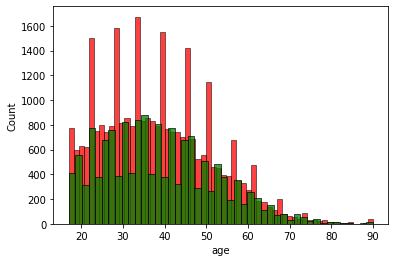

In [103]:
sns.histplot(df_train["age"], color="r")
sns.histplot(df_test["age"], color="g")

#### 3.2.2 fnlwgt ??

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

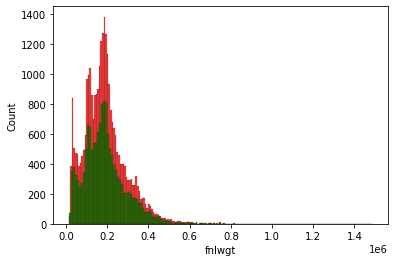

In [104]:
sns.histplot(df_train["fnlwgt"], color="r")
sns.histplot(df_test["fnlwgt"], color="g")

Temos alguns outliers acima de 0.8e6. Vamos verificá-los.

In [105]:
df_train[df_train["fnlwgt"] > 0.8e6]

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,marital-status-Divorced,marital-status-Married-AF-spouse,marital-status-Married-civ-spouse,marital-status-Married-spouse-absent,marital-status-Never-married,marital-status-Separated,marital-status-Widowed,is_american,occupation-Adm-clerical,occupation-Armed-Forces,occupation-Craft-repair,occupation-Exec-managerial,occupation-Farming-fishing,occupation-Handlers-cleaners,occupation-Machine-op-inspct,occupation-Other-service,occupation-Priv-house-serv,occupation-Prof-specialty,occupation-Protective-serv,occupation-Sales,occupation-Tech-support,occupation-Transport-moving,race-Black,race-Other,race-White,is_male,workclass-Federal-gov,workclass-Local-gov,workclass-Private,workclass-Self-emp-inc,workclass-Self-emp-not-inc,workclass-State-gov,workclass-Without-pay,target
414,31,1033222,10,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1597,37,910398,11,0,0,40,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
5369,30,1184622,10,0,0,35,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0
5423,33,913447,10,0,0,40,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7934,43,972354,10,0,0,48,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
8258,35,1226583,11,0,0,52,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1
8485,26,917220,8,0,0,40,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0
9748,23,1038553,9,0,0,45,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
12263,34,849857,9,0,0,40,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
14414,32,857532,9,0,0,40,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0


In [106]:
df_train[df_train["fnlwgt"] > 0.8e6].shape

(26, 40)

In [107]:
df_test[df_test["fnlwgt"] > 0.8e6].shape

(17, 40)

Vou remover esses exemplos

In [108]:
df_train = df_train[df_train["fnlwgt"] <= 0.8e6]
df_test = df_test[df_test["fnlwgt"] <= 0.8e6]

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

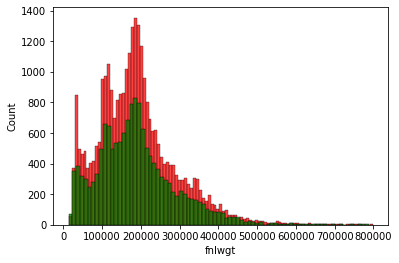

In [109]:
sns.histplot(df_train["fnlwgt"], color="r")
sns.histplot(df_test["fnlwgt"], color="g")

#### 3.2.3 Ganho de capital

Esta variável tem muitos zeros. Posso binarizá-la para também remover outliers, mas a princípio vou mantê-la como está.

<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

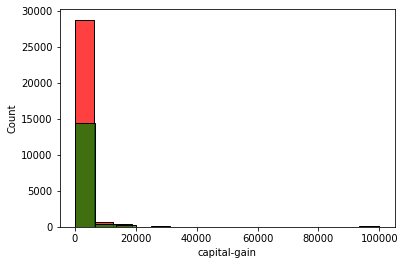

In [110]:
sns.histplot(df_train["capital-gain"], color="r")
sns.histplot(df_test["capital-gain"], color="g")

In [111]:
(df_train["capital-gain"] > 0).astype(int).value_counts()

0    27601
1     2535
Name: capital-gain, dtype: int64

In [112]:
(df_test["capital-gain"] > 0).astype(int).value_counts()

0    13791
1     1252
Name: capital-gain, dtype: int64

In [113]:
#df_train["capital-gain"].head()

In [114]:
#df_train["capital-gain"] = (df_train["capital-gain"] > 0).astype(int)

In [115]:
#df_train["capital-gain"].head()

In [116]:
#df_test["capital-gain"] = (df_test["capital-gain"] > 0).astype(int)

#### 3.2.4 Perda de capital

Esta variável tem muitos zeros. Posso binarizá-la para também remover outliers, mas a princípio vou mantê-la como está.

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

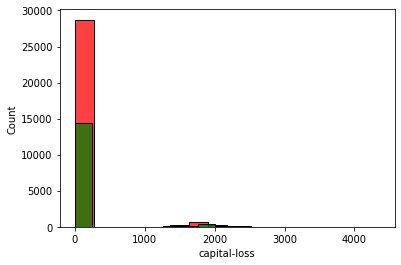

In [117]:
sns.histplot(df_train["capital-loss"], color="r")
sns.histplot(df_test["capital-loss"], color="g")

#### 3.2.5 Horas por semana

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

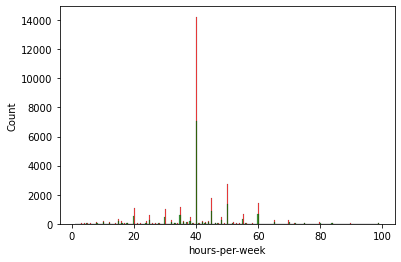

In [118]:
sns.histplot(df_train["hours-per-week"], color="r")
sns.histplot(df_test["hours-per-week"], color="g")

## 4. Seleção de variáveis

Vou aplicar três métodos para selecionar variáveis:

1. Boruta
2. Features muito correlacionadas com a target
3. Features muito correlacionadas entre si

Aqui vou me basear no dataset de treino

### 1. Boruta

Utiliza um método de árvore e shadow features para escolher aquelas que são mais relevantes.

Como o método de árvore não impõe normalização das features, então podemos aplicá-lo diretamente.

In [119]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [120]:
X_train = df_train.drop(columns=["target"])
y_train = df_train["target"]
X_test = df_test.drop(columns=["target"])
y_test = df_test["target"]

In [121]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30136, 39), (30136,), (15043, 39), (15043,))

In [122]:
%%time
forest = RandomForestClassifier(n_estimators=250, max_depth=10, min_samples_split=4, min_samples_leaf=4, n_jobs=-1, random_state=42)
boruta = BorutaPy(
   estimator=forest, 
   n_estimators='auto',
   max_iter=100 # number of trials to perform
)
boruta.fit(np.array(X_train), np.array(y_train)) # print results

CPU times: user 35.1 s, sys: 1.08 s, total: 36.2 s
Wall time: 6.48 s


BorutaPy(estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                          min_samples_split=4, n_estimators=52,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x103D92740),
         n_estimators='auto', random_state=RandomState(MT19937) at 0x103D92740)

In [123]:
green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)

features in the green area: ['age', 'fnlwgt', 'education', 'capital-gain', 'capital-loss', 'hours-per-week', 'marital-status-Divorced', 'marital-status-Married-civ-spouse', 'marital-status-Never-married', 'occupation-Exec-managerial', 'occupation-Other-service', 'occupation-Prof-specialty', 'is_male']
features in the blue area: []


In [124]:
print("Selected variables: {}/{}".format(len(green_area), X_train.shape[1]))

Selected variables: 13/39


In [125]:
X_train = X_train[green_area]
X_test = X_test[green_area]

In [126]:
X_train.shape, X_test.shape

((30136, 13), (15043, 13))

### 2. Correlação com a target

In [127]:
df_aux = pd.concat([X_train, y_train], axis=1)
df_aux.head(2)

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,marital-status-Divorced,marital-status-Married-civ-spouse,marital-status-Never-married,occupation-Exec-managerial,occupation-Other-service,occupation-Prof-specialty,is_male,target
0,39,77516,11,2174,0,40,0,0,1,0,0,0,1,0
1,50,83311,11,0,0,13,0,1,0,1,0,0,1,0


In [128]:
df_aux.corr()["target"].sort_values()

marital-status-Never-married        -0.320
occupation-Other-service            -0.166
marital-status-Divorced             -0.132
fnlwgt                              -0.009
capital-loss                         0.150
occupation-Prof-specialty            0.182
occupation-Exec-managerial           0.214
is_male                              0.217
capital-gain                         0.221
hours-per-week                       0.229
age                                  0.242
education                            0.262
marital-status-Married-civ-spouse    0.445
target                               1.000
Name: target, dtype: float64

Vou remover variáveis que tenham menos de 10% de correlação com a target

In [129]:
corrs = abs(df_aux.corr()["target"]).sort_values()
corrs

fnlwgt                              0.009
marital-status-Divorced             0.132
capital-loss                        0.150
occupation-Other-service            0.166
occupation-Prof-specialty           0.182
occupation-Exec-managerial          0.214
is_male                             0.217
capital-gain                        0.221
hours-per-week                      0.229
age                                 0.242
education                           0.262
marital-status-Never-married        0.320
marital-status-Married-civ-spouse   0.445
target                              1.000
Name: target, dtype: float64

In [130]:
cols_corr_target = list(corrs[corrs >= 0.1].index)

In [131]:
cols_corr_target.remove("target")

In [132]:
cols_corr_target

['marital-status-Divorced',
 'capital-loss',
 'occupation-Other-service',
 'occupation-Prof-specialty',
 'occupation-Exec-managerial',
 'is_male',
 'capital-gain',
 'hours-per-week',
 'age',
 'education',
 'marital-status-Never-married',
 'marital-status-Married-civ-spouse']

In [133]:
len(cols_corr_target)

12

In [134]:
X_train = X_train[cols_corr_target]
X_test = X_test[cols_corr_target]

In [135]:
X_train.shape, X_test.shape

((30136, 12), (15043, 12))

### 3. Features correlacionadas

In [136]:
df_aux = pd.concat([X_train, y_train], axis=1)
df_aux.head(2)

,marital-status-Divorced,capital-loss,occupation-Other-service,occupation-Prof-specialty,occupation-Exec-managerial,is_male,capital-gain,hours-per-week,age,education,marital-status-Never-married,marital-status-Married-civ-spouse,target
0,0,0,0,0,0,1,2174,40,39,11,1,0,0
1,0,0,0,0,1,1,0,13,50,11,0,1,0


<AxesSubplot:>

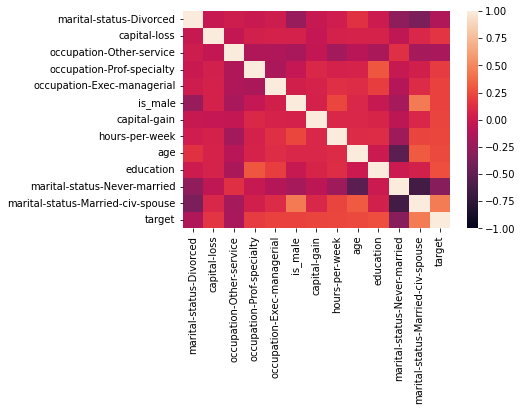

In [137]:
sns.heatmap(df_aux.corr(), vmin=-1, vmax=1)

Existe uma correlação negativa bastante grande entre `marital-status-Married-civ-spouse` e `marital-status-Never-married`. Vou removar a variável com menor correlação com a target entre elas, que no caso é `marital-status-Never-married`.



In [138]:
X_train = X_train.drop(columns=["marital-status-Never-married"])
X_test = X_test.drop(columns=["marital-status-Never-married"])

In [139]:
X_train.shape, X_test.shape

((30136, 11), (15043, 11))

Ao final, temos **11 variáveis** para modelar o fenômeno.

## 5. Modelagem

_3) Build a kNN classifier to predict class variable ">50k" (that is, whether person gets more than US$50k/year or not). Select the hyperparameter using cross-validation; test the final classifier using a holdout dataset._

In [325]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Utilizaremos em todos os casos:
* Grid Search em cima das principais variáveis para descobrir os melhores hiperparâmetros
* Cross-validation com 5 folds, avaliando a métrica do ROC-AUC médio

### 5.1 KNN

Como é um algoritmo baseado em distâncias, precisamos tomar alguns cuidados:
* Normalizar as variáveis
* Não utilizar muitas variáveis (já fizemos feature selection)

In [141]:
model_knn = KNeighborsClassifier(weights="uniform")
pipe_knn = Pipeline([('scaler', MinMaxScaler()), ('knn', model_knn)])
params_knn = {
    "knn__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30, 50, 75, 100, 150, 200, 500, 1000]
}
search_knn = GridSearchCV(pipe_knn, params_knn, scoring='roc_auc', cv=5, n_jobs=-1, verbose=4, return_train_score=True)

In [142]:
%%time
search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 2/5] END knn__n_neighbors=1;, score=(train=0.883, test=0.723) total time=   0.7s
[CV 4/5] END knn__n_neighbors=3;, score=(train=0.923, test=0.824) total time=   0.7s
[CV 5/5] END knn__n_neighbors=4;, score=(train=0.928, test=0.842) total time=   0.8s
[CV 4/5] END knn__n_neighbors=6;, score=(train=0.924, test=0.865) total time=   0.8s
[CV 1/5] END knn__n_neighbors=8;, score=(train=0.919, test=0.867) total time=   0.8s
[CV 4/5] END knn__n_neighbors=9;, score=(train=0.920, test=0.877) total time=   0.8s
[CV 2/5] END knn__n_neighbors=11;, score=(train=0.919, test=0.868) total time=   0.8s
[CV 1/5] END knn__n_neighbors=13;, score=(train=0.915, test=0.880) total time=   0.9s
[CV 4/5] END knn__n_neighbors=14;, score=(train=0.914, test=0.887) total time=   0.9s
[CV 2/5] END knn__n_neighbors=20;, score=(train=0.911, test=0.874) total time=   0.9s
[CV 5/5] END knn__n_neighbors=25;, score=(train=0.906, test=0.887) total time=   1.0

/Users/marcospaulo/Projects/pcs5024-adult-dataset/venv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/5] END knn__n_neighbors=1;, score=(train=0.883, test=0.718) total time=   0.7s
[CV 4/5] END knn__n_neighbors=2;, score=(train=0.917, test=0.792) total time=   0.7s
[CV 2/5] END knn__n_neighbors=4;, score=(train=0.929, test=0.839) total time=   0.7s
[CV 1/5] END knn__n_neighbors=6;, score=(train=0.923, test=0.854) total time=   0.9s
[CV 2/5] END knn__n_neighbors=8;, score=(train=0.923, test=0.863) total time=   0.8s
[CV 1/5] END knn__n_neighbors=10;, score=(train=0.918, test=0.874) total time=   0.8s
[CV 4/5] END knn__n_neighbors=11;, score=(train=0.916, test=0.882) total time=   0.8s
[CV 2/5] END knn__n_neighbors=13;, score=(train=0.916, test=0.871) total time=   0.8s
[CV 5/5] END knn__n_neighbors=14;, score=(train=0.914, test=0.881) total time=   0.9s
[CV 3/5] END knn__n_neighbors=20;, score=(train=0.910, test=0.884) total time=   0.9s
[CV 1/5] END knn__n_neighbors=30;, score=(train=0.904, test=0.888) total time=   1.0s
[CV 4/5] END knn__n_neighbors=50;, score=(train=0.897, test

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 20, 25, 30, 50,
                                              75, 100, 150, 200, 500, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=4)

In [143]:
search_knn.cv_results_

{'mean_fit_time': array([0.02130003, 0.01270261, 0.01565495, 0.01674857, 0.01684389,
        0.01688356, 0.01330223, 0.01584077, 0.01504202, 0.01877756,
        0.01494503, 0.01449356, 0.01532822, 0.01453915, 0.0160243 ,
        0.01674123, 0.01631513, 0.01695099, 0.01756568, 0.01701045,
        0.01627326, 0.01718264, 0.01615205, 0.01416459, 0.01711879]),
 'std_fit_time': array([0.00518153, 0.00225717, 0.00328533, 0.00427783, 0.00404028,
        0.00353288, 0.00284533, 0.00404168, 0.00396581, 0.00579144,
        0.00200941, 0.00131107, 0.00053155, 0.00117521, 0.00151732,
        0.0008838 , 0.00048508, 0.00263259, 0.00223301, 0.00255036,
        0.00091113, 0.00241843, 0.00092422, 0.003184  , 0.00415462]),
 'mean_score_time': array([0.70618305, 0.73529878, 0.72867064, 0.75132985, 0.75106354,
        0.75536466, 0.77190514, 0.76311626, 0.78908105, 0.81086497,
        0.82132015, 0.84466348, 0.84979801, 0.85758338, 0.88103542,
        0.90567746, 0.94635878, 0.96088123, 1.06721539, 1.11

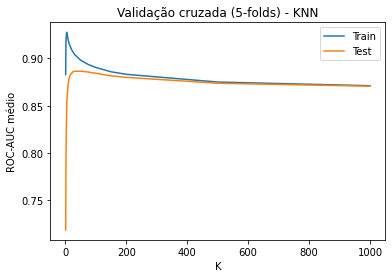

In [144]:
mean_test_scores = search_knn.cv_results_["mean_test_score"]
std_test_scores = search_knn.cv_results_["std_test_score"] # como plotar?
mean_train_scores = search_knn.cv_results_["mean_train_score"]
std_train_scores = search_knn.cv_results_["std_train_score"] # como plotar?
param_k = search_knn.cv_results_["param_knn__n_neighbors"]

plt.title("Validação cruzada (5-folds) - KNN")
plt.xlabel("K")
plt.ylabel("ROC-AUC médio")
sns.lineplot(x=param_k, y=mean_train_scores)
sns.lineplot(x=param_k, y=mean_test_scores)
plt.legend(["Train", "Test"])

In [145]:
search_knn.best_params_

{'knn__n_neighbors': 50}

In [146]:
search_knn.best_score_

0.8865743862525154

In [147]:
best_model_knn = search_knn.best_estimator_
best_model_knn

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=50))])

* Validação holdout dataset

Precision, recall e acurácia no treino

In [148]:
threshold = 0.5
pred_train = best_model_knn.predict_proba(X_train)[:, 1]
y_pred_train = (pred_train > threshold).astype(int)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90     22634
           1       0.74      0.56      0.63      7502

    accuracy                           0.84     30136
   macro avg       0.80      0.74      0.77     30136
weighted avg       0.83      0.84      0.83     30136



Precision, recall e acurácia no teste

In [149]:
pred_test = best_model_knn.predict_proba(X_test)[:, 1]
y_pred_test = (pred_test > threshold).astype(int)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     11346
           1       0.71      0.54      0.61      3697

    accuracy                           0.83     15043
   macro avg       0.78      0.73      0.75     15043
weighted avg       0.82      0.83      0.82     15043



* ROC-AUC no dataset de teste

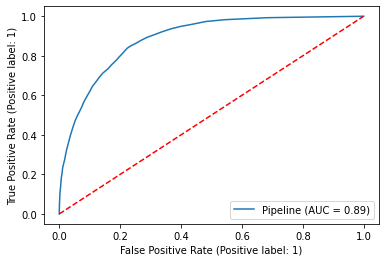

In [150]:
RocCurveDisplay.from_estimator(best_model_knn, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')

* Matriz de confusão

Text(33.0, 0.5, 'Real')

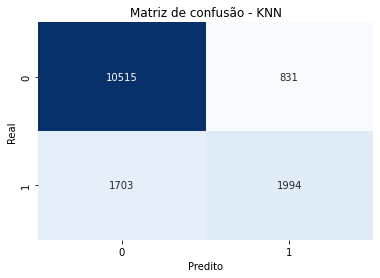

In [151]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, cmap="Blues", annot=True, cbar=False, fmt='d')
plt.title("Matriz de confusão - KNN")
plt.xlabel("Predito")
plt.ylabel("Real")

* SHAP values

In [152]:
# SHAP values

_4) Repeat (3) using three other classification techniques (for instance, neural network, classification tree, random forest, boosted trees, SVM, Naive Bayes)._

### 5.2 RandomForestClassifier

Como é um algoritmo baseado em árvore:
* Não precisamos normalizar as variáveis

In [158]:
model_rf = RandomForestClassifier(criterion='gini', n_jobs=-1, random_state=42, class_weight="balanced")
pipe_rf = Pipeline([('rf', model_rf)])
params_rf = {
    "rf__n_estimators": [100, 250, 500, 1000, 1500],
    "rf__max_depth": [5, 10, 15, 20],
    "rf__min_samples_split": [3, 5, 7, 10],
    "rf__min_samples_leaf": [3, 5, 7, 10],
    
}
search_rf = GridSearchCV(pipe_rf, params_rf, scoring='roc_auc', cv=5, n_jobs=-1, verbose=4, return_train_score=True)

In [159]:
%%time
search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=100;, score=(train=0.902, test=0.900) total time=   0.8s
[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=500;, score=(train=0.903, test=0.901) total time=   3.2s
[CV 4/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=1000;, score=(train=0.903, test=0.904) total time=   6.7s
[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=100;, score=(train=0.902, test=0.901) total time=   0.7s
[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=250;, score=(train=0.902, test=0.903) total time=   1.9s
[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=500;, score=(train=0.903, test=0.901) total time=   3.4s
[CV 2/5] END rf__

[CV 4/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=100;, score=(train=0.903, test=0.904) total time=   0.6s
[CV 4/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=250;, score=(train=0.903, test=0.903) total time=   1.4s
[CV 2/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=1000;, score=(train=0.905, test=0.894) total time=   6.5s
[CV 4/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=1500;, score=(train=0.903, test=0.904) total time=  10.8s
[CV 2/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=1500;, score=(train=0.905, test=0.894) total time=  11.6s
[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=7, rf__n_estimators=1000;, score=(train=0.903, test=0.901) total time=   7.3s
[CV 4/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=7,

[CV 2/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=250;, score=(train=0.905, test=0.894) total time=   1.8s
[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=1000;, score=(train=0.903, test=0.902) total time=   6.9s
[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=1500;, score=(train=0.902, test=0.902) total time=  10.7s
[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=1500;, score=(train=0.902, test=0.903) total time=  11.5s
[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=7, rf__n_estimators=500;, score=(train=0.902, test=0.902) total time=   3.7s
[CV 2/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=7, rf__n_estimators=1500;, score=(train=0.905, test=0.894) total time=  11.1s
[CV 2/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=10

[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=100;, score=(train=0.901, test=0.902) total time=   0.7s
[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=250;, score=(train=0.902, test=0.902) total time=   1.6s
[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=1000;, score=(train=0.902, test=0.903) total time=   6.4s
[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=100;, score=(train=0.902, test=0.900) total time=   0.5s
[CV 2/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=100;, score=(train=0.904, test=0.893) total time=   0.7s
[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=100;, score=(train=0.901, test=0.902) total time=   0.8s
[CV 4/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf

[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=100;, score=(train=0.902, test=0.901) total time=   0.8s
[CV 2/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=500;, score=(train=0.905, test=0.894) total time=   3.4s
[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=1000;, score=(train=0.902, test=0.902) total time=   7.2s
[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=250;, score=(train=0.903, test=0.901) total time=   1.7s
[CV 4/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=250;, score=(train=0.903, test=0.903) total time=   1.8s
[CV 4/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=500;, score=(train=0.903, test=0.903) total time=   3.5s
[CV 4/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf

[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=250;, score=(train=0.902, test=0.903) total time=   1.5s
[CV 4/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=500;, score=(train=0.903, test=0.903) total time=   3.4s
[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=1500;, score=(train=0.902, test=0.903) total time=  10.8s
[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=1000;, score=(train=0.903, test=0.902) total time=   6.7s
[CV 4/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=1500;, score=(train=0.903, test=0.904) total time=  11.5s
[CV 5/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=7, rf__n_estimators=1000;, score=(train=0.902, test=0.902) total time=   7.6s
[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=10

[CV 2/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=100;, score=(train=0.904, test=0.893) total time=   0.6s
[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=500;, score=(train=0.902, test=0.903) total time=   3.3s
[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=3, rf__n_estimators=1500;, score=(train=0.903, test=0.901) total time=  10.0s
[CV 2/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=500;, score=(train=0.905, test=0.894) total time=   3.5s
[CV 3/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=5, rf__n_estimators=1000;, score=(train=0.902, test=0.903) total time=   7.0s
[CV 1/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=7, rf__n_estimators=100;, score=(train=0.902, test=0.900) total time=   0.6s
[CV 2/5] END rf__max_depth=5, rf__min_samples_leaf=3, rf__min_samples_split=7, r

[CV 4/5] END rf__max_depth=10, rf__min_samples_leaf=7, rf__min_samples_split=3, rf__n_estimators=250;, score=(train=0.920, test=0.913) total time=   2.8s
[CV 2/5] END rf__max_depth=10, rf__min_samples_leaf=7, rf__min_samples_split=3, rf__n_estimators=500;, score=(train=0.921, test=0.905) total time=   5.7s
[CV 4/5] END rf__max_depth=10, rf__min_samples_leaf=7, rf__min_samples_split=3, rf__n_estimators=1000;, score=(train=0.920, test=0.913) total time=  11.1s
[CV 2/5] END rf__max_depth=10, rf__min_samples_leaf=7, rf__min_samples_split=5, rf__n_estimators=100;, score=(train=0.921, test=0.905) total time=   1.1s
[CV 5/5] END rf__max_depth=10, rf__min_samples_leaf=7, rf__min_samples_split=5, rf__n_estimators=100;, score=(train=0.920, test=0.914) total time=   1.0s
[CV 2/5] END rf__max_depth=10, rf__min_samples_leaf=7, rf__min_samples_split=5, rf__n_estimators=250;, score=(train=0.921, test=0.905) total time=   3.1s
[CV 1/5] END rf__max_depth=10, rf__min_samples_leaf=7, rf__min_samples_spli

CPU times: user 8.96 s, sys: 1.27 s, total: 10.2 s
Wall time: 34min 22s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=-1,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [5, 10, 15, 20],
                         'rf__min_samples_leaf': [3, 5, 7, 10],
                         'rf__min_samples_split': [3, 5, 7, 10],
                         'rf__n_estimators': [100, 250, 500, 1000, 1500]},
             return_train_score=True, scoring='roc_auc', verbose=4)

In [160]:
search_rf.cv_results_

{'mean_fit_time': array([  0.64722624,   1.49723806,   3.01007781,   6.19237723,
          9.57815418,   0.65622854,   1.7011714 ,   3.35012946,
          6.50565562,  10.4981039 ,   0.69092999,   2.02832384,
          3.44749131,   6.87706485,  10.54176946,   0.8033112 ,
          1.89526191,   3.69541521,   7.0836761 ,  10.75651302,
          0.73639359,   1.89359431,   3.68547745,   7.058918  ,
         10.91001558,   0.66886296,   1.8850502 ,   3.54386458,
          7.36569352,  11.11811419,   0.70678859,   1.96795616,
          3.57726746,   7.16053267,  11.29271355,   0.76520972,
          2.00817513,   3.63184795,   7.25525126,  11.08558569,
          0.78768797,   1.87491007,   3.5858026 ,   7.31638656,
         11.15160079,   0.79902878,   1.95320716,   3.71858983,
          7.31384296,  11.9981174 ,   0.90020094,   2.01357708,
          3.81276307,   7.17970924,  11.34863081,   0.81491847,
          1.9399754 ,   3.69710207,   7.43382668,  11.31824894,
          0.7359024 ,  

In [161]:
#mean_test_scores = search_rf.cv_results_["mean_test_score"]
#std_test_scores = search_rf.cv_results_["std_test_score"] # como plotar?
#mean_train_scores = search_rf.cv_results_["mean_train_score"]
#std_train_scores = search_rf.cv_results_["std_train_score"] # como plotar?
#param_k = search_rf.cv_results_["param_knn__n_neighbors"]
#
#plt.title("Validação cruzada (5-folds) - KNN")
#plt.xlabel("K")
#plt.ylabel("ROC-AUC médio")
#sns.lineplot(x=param_k, y=mean_train_scores)
#sns.lineplot(x=param_k, y=mean_test_scores)
#plt.legend(["Train", "Test"])

In [162]:
search_rf.best_params_

{'rf__max_depth': 15,
 'rf__min_samples_leaf': 3,
 'rf__min_samples_split': 10,
 'rf__n_estimators': 500}

In [163]:
search_rf.best_score_

0.9131514257967229

In [164]:
best_model_rf = search_rf.best_estimator_
best_model_rf

Pipeline(steps=[('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=15,
                                        min_samples_leaf=3,
                                        min_samples_split=10, n_estimators=500,
                                        n_jobs=-1, random_state=42))])

* Validação holdout dataset

Precision, recall e acurácia no treino

In [165]:
threshold = 0.5
pred_train = best_model_rf.predict_proba(X_train)[:, 1]
y_pred_train = (pred_train > threshold).astype(int)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88     22634
           1       0.62      0.89      0.73      7502

    accuracy                           0.84     30136
   macro avg       0.79      0.85      0.81     30136
weighted avg       0.87      0.84      0.84     30136



Precision, recall e acurácia no teste

In [166]:
pred_test = best_model_rf.predict_proba(X_test)[:, 1]
y_pred_test = (pred_test > threshold).astype(int)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87     11346
           1       0.59      0.85      0.70      3697

    accuracy                           0.82     15043
   macro avg       0.77      0.83      0.78     15043
weighted avg       0.86      0.82      0.83     15043



* ROC-AUC no dataset de teste

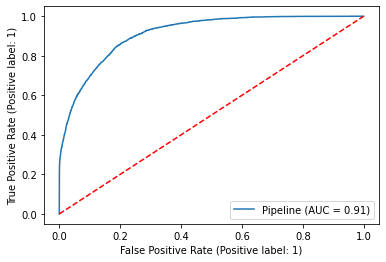

In [167]:
RocCurveDisplay.from_estimator(best_model_rf, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')

* Matriz de confusão

Text(33.0, 0.5, 'Real')

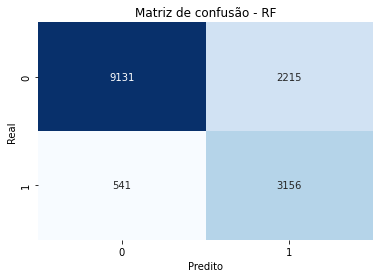

In [170]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, cmap="Blues", annot=True, cbar=False, fmt='d')
plt.title("Matriz de confusão - RF")
plt.xlabel("Predito")
plt.ylabel("Real")

* SHAP values

In [171]:
# SHAP values

### 5.3 SVM Radial

Precisamos tomar alguns cuidados:

* Normalizar as variáveis
* Não utilizar muitas variáveis (já fizemos feature selection)

SVM escala quadraticamente com a quantidade de exemplos. Vou reduzir o sample para um terço do que temos para acelerar o método (https://stackoverflow.com/questions/53940258/svc-classifier-taking-too-much-time-for-training)

In [212]:
X_train.shape, y_train.shape

((30136, 11), (30136,))

In [213]:
y_train.value_counts()

0    22634
1     7502
Name: target, dtype: int64

In [214]:
X_train_svc = X_train.sample(frac=0.333, random_state=42)
y_train_svc = y_train.loc[X_train_svc.index]

In [215]:
X_train_svc.shape, y_train_svc.shape

((10035, 11), (10035,))

In [216]:
X_train_svc.index, y_train_svc.index

(Int64Index([23803,  3395, 13076, 21566,   466, 10372, 25447, 30415, 31520,
              8200,
             ...
             17487, 23882, 32367, 14515, 24160, 27281, 19798,  6359, 23993,
               911],
            dtype='int64', length=10035),
 Int64Index([23803,  3395, 13076, 21566,   466, 10372, 25447, 30415, 31520,
              8200,
             ...
             17487, 23882, 32367, 14515, 24160, 27281, 19798,  6359, 23993,
               911],
            dtype='int64', length=10035))

In [217]:
model_svc = SVC(kernel="rbf", probability=True, class_weight='balanced', random_state=42)
pipe_svc = Pipeline([('scaler', MinMaxScaler()), ('svc', model_svc)])
params_svc = {
    "svc__C": [0.01, 0.1, 1, 5, 10, 25],
}
search_svc = GridSearchCV(pipe_svc, params_svc, scoring='roc_auc', cv=5, n_jobs=-1, verbose=4, return_train_score=True)

In [219]:
%%time
search_svc.fit(X_train_svc, y_train_svc)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 6.42 s, sys: 195 ms, total: 6.61 s
Wall time: 50.2 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            probability=True,
                                            random_state=42))]),
             n_jobs=-1, param_grid={'svc__C': [0.01, 0.1, 1, 5, 10, 25]},
             return_train_score=True, scoring='roc_auc', verbose=4)

In [220]:
search_svc.cv_results_

{'mean_fit_time': array([9.3421227 , 7.74992943, 7.54046764, 7.77046957, 7.86955528,
        7.37729316]),
 'std_fit_time': array([0.05226217, 0.19397503, 0.08783104, 0.11972235, 0.30405523,
        0.14924777]),
 'mean_score_time': array([0.71314979, 0.6005651 , 0.57276654, 0.56449523, 0.53324118,
        0.45462003]),
 'std_score_time': array([0.01012821, 0.01425439, 0.01016284, 0.01075857, 0.02742889,
        0.01802075]),
 'param_svc__C': masked_array(data=[0.01, 0.1, 1, 5, 10, 25],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'svc__C': 0.01},
  {'svc__C': 0.1},
  {'svc__C': 1},
  {'svc__C': 5},
  {'svc__C': 10},
  {'svc__C': 25}],
 'split0_test_score': array([0.86792408, 0.87617457, 0.88554757, 0.88792356, 0.8889832 ,
        0.88733677]),
 'split1_test_score': array([0.86196982, 0.87344726, 0.87999179, 0.87854108, 0.87908395,
        0.87640361]),
 'split2_test_score': array([0.86575029, 0.88178653

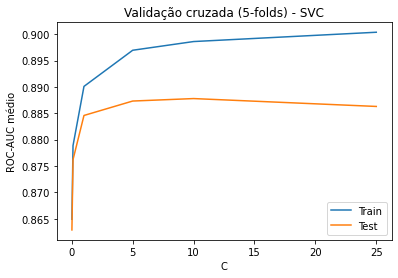

In [225]:
mean_test_scores = search_svc.cv_results_["mean_test_score"]
std_test_scores = search_svc.cv_results_["std_test_score"] # como plotar?
mean_train_scores = search_svc.cv_results_["mean_train_score"]
std_train_scores = search_svc.cv_results_["std_train_score"] # como plotar?
param_k = search_svc.cv_results_["param_svc__C"]

plt.title("Validação cruzada (5-folds) - SVC")
plt.xlabel("C")
plt.ylabel("ROC-AUC médio")
sns.lineplot(x=param_k, y=mean_train_scores)
sns.lineplot(x=param_k, y=mean_test_scores)
plt.legend(["Train", "Test"])

In [222]:
search_svc.best_params_

{'svc__C': 10}

In [223]:
search_svc.best_score_

0.8877918513113681

In [224]:
best_model_svc = search_svc.best_estimator_
best_model_svc

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svc',
                 SVC(C=10, class_weight='balanced', probability=True,
                     random_state=42))])

* Validação holdout dataset

Precision, recall e acurácia no treino

In [204]:
threshold = 0.5
pred_train = best_model_svc.predict_proba(X_train)[:, 1]
y_pred_train = (pred_train > threshold).astype(int)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     22634
           1       0.64      0.73      0.68      7502

    accuracy                           0.83     30136
   macro avg       0.77      0.80      0.78     30136
weighted avg       0.84      0.83      0.83     30136



Precision, recall e acurácia no teste

In [205]:
pred_test = best_model_svc.predict_proba(X_test)[:, 1]
y_pred_test = (pred_test > threshold).astype(int)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88     11346
           1       0.63      0.72      0.67      3697

    accuracy                           0.83     15043
   macro avg       0.77      0.79      0.78     15043
weighted avg       0.84      0.83      0.83     15043



* ROC-AUC no dataset de teste

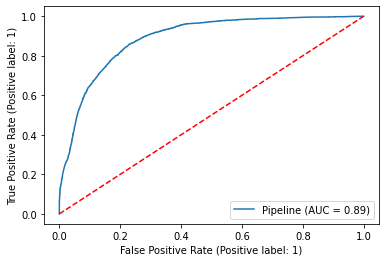

In [226]:
RocCurveDisplay.from_estimator(best_model_svc, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')

* Matriz de confusão

Text(33.0, 0.5, 'Real')

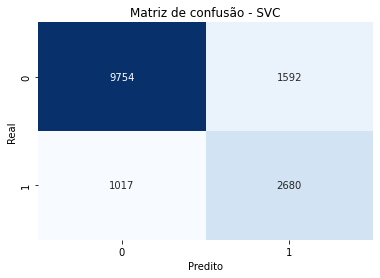

In [228]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, cmap="Blues", annot=True, cbar=False, fmt='d')
plt.title("Matriz de confusão - SVC")
plt.xlabel("Predito")
plt.ylabel("Real")

* SHAP values

In [229]:
# SHAP values

### 5.4 Naive Bayes Gaussiano

Tentei binarizar as variáveis numéricas e aplicar um Naive Bayes Categórico.

Por fim, acabei aplicando um Naive Bayes Gaussiano.

In [340]:
X_train.head(2)

,marital-status-Divorced,capital-loss,occupation-Other-service,occupation-Prof-specialty,occupation-Exec-managerial,is_male,capital-gain,hours-per-week,age,education,marital-status-Married-civ-spouse
0,0,0,0,0,0,1,2174,40,39,11,0
1,0,0,0,0,1,1,0,13,50,11,1


In [341]:
#X_train_nb = X_train.copy()
#X_test_nb = X_test.copy()

In [342]:
#X_train_nb["capital-gain"] = (X_train_nb["capital-gain"] > 0).astype(int)
#X_train_nb["capital-gain"].value_counts()

In [343]:
#X_test_nb["capital-gain"] = (X_test_nb["capital-gain"] > 0).astype(int)
#X_test_nb["capital-gain"].value_counts()

In [344]:
#num_features = ["hours-per-week", "age"]

In [345]:
#discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')

In [346]:
#X_train_nb[num_features] = pd.DataFrame(discretizer.fit_transform(X_train_nb[num_features]), columns=["hours-per-week", "age"], index=X_train_nb.index, dtype=int)

In [347]:
#X_test_nb[num_features] = pd.DataFrame(discretizer.fit_transform(X_test_nb[num_features]), columns=["hours-per-week", "age"], index=X_test_nb.index, dtype=int)

In [348]:
#X_train_nb[num_features]

In [349]:
#X_test_nb[num_features]

In [350]:
#X_train_nb.head()

In [351]:
#X_test_nb.head()

Agora aplicamos o modelo. Como é um algoritmo baseado em probabilidades condicionais:

* Não precisamos normalizar as variáveis

In [352]:
model_nb = GaussianNB()
pipe_nb = Pipeline([('nb', model_nb)])
params_nb = {
    "nb__var_smoothing": np.logspace(0, -9, num=100)
}
search_nb = GridSearchCV(pipe_nb, params_nb, scoring='roc_auc', cv=5, n_jobs=-1, verbose=4, return_train_score=True)

In [353]:
%%time
search_nb.fit(X_train_nb, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 263 ms, sys: 88.3 ms, total: 351 ms
Wall time: 1.88 s


GridSearchCV(cv=5, estimator=Pipeline(steps=[('nb', GaussianNB())]), n_jobs=-1,
             param_grid={'nb__var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             return_train_score=True, scoring='roc_auc', verbose=4)

In [354]:
search_nb.cv_results_

{'mean_fit_time': array([0.00954704, 0.00830355, 0.00744219, 0.00518084, 0.00630398,
        0.00545177, 0.00706601, 0.00611248, 0.00637212, 0.00635681,
        0.00679679, 0.00762744, 0.00851145, 0.00829878, 0.00692778,
        0.00622582, 0.00655522, 0.0080862 , 0.00524015, 0.00697637,
        0.00786281, 0.00688167, 0.00716352, 0.00968623, 0.00745716,
        0.00602226, 0.00636621, 0.00904789, 0.00726709, 0.00813842,
        0.0051836 , 0.0075624 , 0.00769005, 0.00847816, 0.00504675,
        0.00505376, 0.0068069 , 0.00847554, 0.00723991, 0.00965424,
        0.00805821, 0.00688319, 0.01078787, 0.00989738, 0.00615115,
        0.00726638, 0.00568457, 0.00572205, 0.00629897, 0.00635691,
        0.00763359, 0.00645776, 0.00719566, 0.00768943, 0.00668221,
        0.00916286, 0.00976887, 0.00655785, 0.00707259, 0.00816693,
        0.00736809, 0.00988169, 0.007336  , 0.0066021 , 0.00801678,
        0.00612936, 0.00597444, 0.01020756, 0.00559573, 0.00861044,
        0.00595345, 0.00620561,

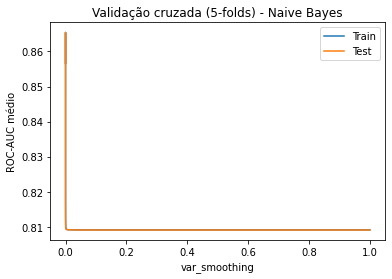

In [362]:
mean_test_scores = search_nb.cv_results_["mean_test_score"]
std_test_scores = search_nb.cv_results_["std_test_score"] # como plotar?
mean_train_scores = search_nb.cv_results_["mean_train_score"]
std_train_scores = search_nb.cv_results_["std_train_score"] # como plotar?
param_var_smoothing = search_nb.cv_results_["param_nb__var_smoothing"]

plt.title("Validação cruzada (5-folds) - Naive Bayes")
plt.xlabel("var_smoothing")
plt.ylabel("ROC-AUC médio")
sns.lineplot(x=param_var_smoothing, y=mean_train_scores)
sns.lineplot(x=param_var_smoothing, y=mean_test_scores)
plt.legend(["Train", "Test"])

In [356]:
search_nb.best_params_

{'nb__var_smoothing': 6.579332246575682e-07}

In [357]:
search_nb.best_score_

0.8653723501026258

In [358]:
best_model_nb = search_nb.best_estimator_
best_model_nb

Pipeline(steps=[('nb', GaussianNB(var_smoothing=6.579332246575682e-07))])

* Validação holdout dataset

Precision, recall e acurácia no treino

In [359]:
threshold = 0.5
pred_train = best_model_nb.predict_proba(X_train)[:, 1]
y_pred_train = (pred_train > threshold).astype(int)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86     22634
           1       0.63      0.21      0.32      7502

    accuracy                           0.77     30136
   macro avg       0.71      0.59      0.59     30136
weighted avg       0.75      0.77      0.73     30136



Precision, recall e acurácia no teste

In [360]:
pred_test = best_model_nb.predict_proba(X_test)[:, 1]
y_pred_test = (pred_test > threshold).astype(int)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87     11346
           1       0.62      0.21      0.32      3697

    accuracy                           0.77     15043
   macro avg       0.71      0.58      0.59     15043
weighted avg       0.75      0.77      0.73     15043



* ROC-AUC no dataset de teste

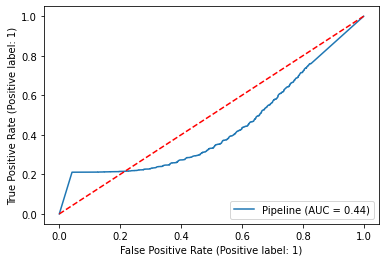

In [361]:
RocCurveDisplay.from_estimator(best_model_nb, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')

* Matriz de confusão

Text(33.0, 0.5, 'Real')

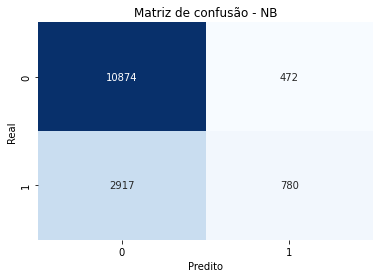

In [363]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, cmap="Blues", annot=True, cbar=False, fmt='d')
plt.title("Matriz de confusão - NB")
plt.xlabel("Predito")
plt.ylabel("Real")

* SHAP values

In [364]:
# SHAP values

### Melhor modelo

_5) Present accuracy, precision and recall for the best classifier_

In [366]:
best_model = best_model_rf

[CV 1/5] END .nb__alpha=0.5;, score=(train=0.890, test=0.890) total time=   0.0s
[CV 4/5] END .nb__alpha=1.0;, score=(train=0.889, test=0.889) total time=   0.0s
[CV 5/5] END .nb__alpha=1.0;, score=(train=0.889, test=0.889) total time=   0.0s
[CV 2/5] END .nb__alpha=1.0;, score=(train=0.891, test=0.882) total time=   0.0s
[CV 3/5] END ...nb__alpha=2.0;, score=(train=0.887, test=nan) total time=   0.0s
[CV 1/5] END nb__var_smoothing=0.8111308307896871;, score=(train=0.810, test=0.801) total time=   0.0s
[CV 2/5] END nb__var_smoothing=0.657933224657568;, score=(train=0.810, test=0.805) total time=   0.0s
[CV 1/5] END nb__var_smoothing=0.43287612810830584;, score=(train=0.810, test=0.801) total time=   0.0s
[CV 2/5] END nb__var_smoothing=0.43287612810830584;, score=(train=0.810, test=0.805) total time=   0.0s
[CV 5/5] END nb__var_smoothing=0.2848035868435802;, score=(train=0.807, test=0.816) total time=   0.0s
[CV 1/5] END nb__var_smoothing=0.23101297000831597;, score=(train=0.810, test=0

[CV 2/5] END .nb__alpha=1.0;, score=(train=0.891, test=0.882) total time=   0.0s
[CV 1/5] END .nb__alpha=0.5;, score=(train=0.890, test=0.890) total time=   0.0s
[CV 4/5] END .nb__alpha=1.0;, score=(train=0.889, test=0.889) total time=   0.0s
[CV 2/5] END nb__var_smoothing=1.0;, score=(train=0.810, test=0.805) total time=   0.0s
[CV 3/5] END nb__var_smoothing=0.8111308307896871;, score=(train=0.808, test=0.811) total time=   0.0s
[CV 5/5] END nb__var_smoothing=0.657933224657568;, score=(train=0.807, test=0.816) total time=   0.0s
[CV 4/5] END nb__var_smoothing=0.3511191734215131;, score=(train=0.809, test=0.812) total time=   0.0s
[CV 5/5] END nb__var_smoothing=0.3511191734215131;, score=(train=0.807, test=0.816) total time=   0.0s
[CV 5/5] END nb__var_smoothing=0.1873817422860384;, score=(train=0.807, test=0.816) total time=   0.0s
[CV 1/5] END nb__var_smoothing=0.15199110829529336;, score=(train=0.810, test=0.801) total time=   0.0s
[CV 3/5] END nb__var_smoothing=0.0533669923120631;,

[CV 5/5] END .nb__alpha=0.5;, score=(train=0.889, test=0.889) total time=   0.0s
[CV 5/5] END .nb__alpha=0.5;, score=(train=0.889, test=0.889) total time=   0.0s
[CV 2/5] END .nb__alpha=2.0;, score=(train=0.890, test=0.881) total time=   0.0s
[CV 3/5] END nb__var_smoothing=1.0;, score=(train=0.808, test=0.811) total time=   0.0s
[CV 5/5] END nb__var_smoothing=0.8111308307896871;, score=(train=0.807, test=0.816) total time=   0.0s
[CV 1/5] END nb__var_smoothing=0.533669923120631;, score=(train=0.810, test=0.801) total time=   0.0s
[CV 2/5] END nb__var_smoothing=0.3511191734215131;, score=(train=0.810, test=0.805) total time=   0.0s
[CV 3/5] END nb__var_smoothing=0.3511191734215131;, score=(train=0.808, test=0.811) total time=   0.0s
[CV 3/5] END nb__var_smoothing=0.1873817422860384;, score=(train=0.808, test=0.811) total time=   0.0s
[CV 4/5] END nb__var_smoothing=0.1873817422860384;, score=(train=0.809, test=0.812) total time=   0.0s
[CV 4/5] END nb__var_smoothing=0.0657933224657568;, 

### 5.5 [EXTRA] Multi-Layer Perceptron

_6) Extra points: repeat (3) using a Multi-Layer Perceptron._

Vou normalizar as variáveis para evitar qualquer problema com a escala e a aplicação do Gradiente Descendente na otimização dos parâmetros.

Note: The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

In [ ]:
#model_mlp = MLPClassifier(hidden_layer_sizes=(len(X_train.columns), 50, 50), activation='relu', solver='lbfgs', random_state=42)
#pipe_mlp = Pipeline([('scaler', MinMaxScaler()), ('mlp', model_mlp)])
#params_mlp = {
#    "mlp__alpha": [0.0001, 0.001, 0.01, 0.1],
#}
#search_mlp = GridSearchCV(pipe_mlp, params_mlp, scoring='roc_auc', cv=5, n_jobs=-1, verbose=4, return_train_score=True)

In [392]:
model_mlp = MLPClassifier(hidden_layer_sizes=(len(X_train.columns), 50, 50), activation='relu', solver='adam', epsilon=1e-8, beta_2=0.999, max_iter=2000, random_state=42)
pipe_mlp = Pipeline([('scaler', MinMaxScaler()), ('mlp', model_mlp)])
params_mlp = {
    "mlp__alpha": [0.0001, 0.001, 0.01, 0.1],
    "mlp__beta_1": [0.9, 0.99, 0.999],
}
search_mlp = GridSearchCV(pipe_mlp, params_mlp, scoring='roc_auc', cv=5, n_jobs=-1, verbose=4, return_train_score=True)

In [393]:
%%time
search_mlp.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: user 1min 55s, sys: 1.67 s, total: 1min 56s
Wall time: 1min 39s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('mlp',
                                        MLPClassifier(hidden_layer_sizes=(11,
                                                                          50,
                                                                          50),
                                                      max_iter=2000,
                                                      random_state=42))]),
             n_jobs=-1,
             param_grid={'mlp__alpha': [0.0001, 0.001, 0.01, 0.1],
                         'mlp__beta_1': [0.9, 0.99, 0.999]},
             return_train_score=True, scoring='roc_auc', verbose=4)

In [394]:
search_mlp.cv_results_

{'mean_fit_time': array([14.1867064 ,  7.80174932,  7.00363975, 12.96397038,  9.96783977,
        11.36763196,  9.50312495,  9.58407454, 12.42345123, 12.26320491,
        12.56249137,  7.84497857]),
 'std_fit_time': array([5.50049994, 2.95917965, 2.57483983, 3.23581859, 4.25885723,
        4.10044526, 1.82976925, 1.81977647, 2.38334899, 2.36985626,
        2.45308326, 2.39309563]),
 'mean_score_time': array([0.00833955, 0.00883012, 0.00727057, 0.00804477, 0.00906239,
        0.00871797, 0.00712438, 0.0074656 , 0.00829177, 0.00793805,
        0.00837402, 0.00621715]),
 'std_score_time': array([0.00318275, 0.00501489, 0.00104861, 0.00242031, 0.00222932,
        0.0012888 , 0.00079095, 0.00117257, 0.00196649, 0.00115822,
        0.00202638, 0.00110128]),
 'param_mlp__alpha': masked_array(data=[0.0001, 0.0001, 0.0001, 0.001, 0.001, 0.001, 0.01,
                    0.01, 0.01, 0.1, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False,
                    Fal

In [395]:
#mean_test_scores = search_knn.cv_results_["mean_test_score"]
#std_test_scores = search_knn.cv_results_["std_test_score"] # como plotar?
#mean_train_scores = search_knn.cv_results_["mean_train_score"]
#std_train_scores = search_knn.cv_results_["std_train_score"] # como plotar?
#param_k = search_knn.cv_results_["param_knn__n_neighbors"]
#
#plt.title("Validação cruzada (5-folds) - KNN")
#plt.xlabel("K")
#plt.ylabel("ROC-AUC médio")
#sns.lineplot(x=param_k, y=mean_train_scores)
#sns.lineplot(x=param_k, y=mean_test_scores)
#plt.legend(["Train", "Test"])

In [396]:
search_mlp.best_params_

{'mlp__alpha': 0.0001, 'mlp__beta_1': 0.9}

In [397]:
search_mlp.best_score_

0.902423730150155

In [398]:
best_model_mlp = search_mlp.best_estimator_
best_model_mlp

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(11, 50, 50), max_iter=2000,
                               random_state=42))])

* Validação holdout dataset

Precision, recall e acurácia no treino

In [399]:
threshold = 0.5
pred_train = best_model_mlp.predict_proba(X_train)[:, 1]
y_pred_train = (pred_train > threshold).astype(int)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     22634
           1       0.73      0.61      0.67      7502

    accuracy                           0.85     30136
   macro avg       0.81      0.77      0.78     30136
weighted avg       0.84      0.85      0.84     30136



Precision, recall e acurácia no teste

In [400]:
pred_test = best_model_mlp.predict_proba(X_test)[:, 1]
y_pred_test = (pred_test > threshold).astype(int)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11346
           1       0.72      0.60      0.66      3697

    accuracy                           0.84     15043
   macro avg       0.80      0.76      0.78     15043
weighted avg       0.84      0.84      0.84     15043



* ROC-AUC no dataset de teste

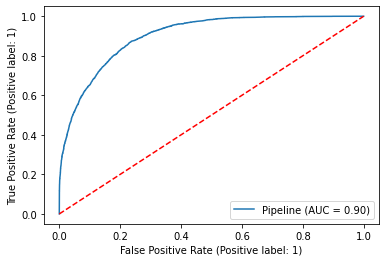

In [401]:
RocCurveDisplay.from_estimator(best_model_mlp, X_test, y_test)
plt.plot([0, 1], [0, 1],'r--')

* Matriz de confusão

Text(33.0, 0.5, 'Real')

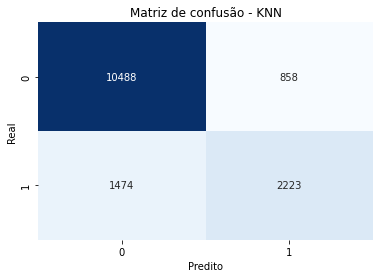

In [402]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, cmap="Blues", annot=True, cbar=False, fmt='d')
plt.title("Matriz de confusão - KNN")
plt.xlabel("Predito")
plt.ylabel("Real")

* SHAP values

In [403]:
# SHAP values